In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/Hotel_Reviews.csv')
df.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


In [ ]:
df.columns

In [ ]:
df.shape

(515738, 17)

In [ ]:
df.isnull().sum()

Hotel_Address                                    0
Additional_Number_of_Scoring                     0
Review_Date                                      0
Average_Score                                    0
Hotel_Name                                       0
Reviewer_Nationality                             0
Negative_Review                                  0
Review_Total_Negative_Word_Counts                0
Total_Number_of_Reviews                          0
Positive_Review                                  0
Review_Total_Positive_Word_Counts                0
Total_Number_of_Reviews_Reviewer_Has_Given       0
Reviewer_Score                                   0
Tags                                             0
days_since_review                                0
lat                                           3268
lng                                           3268
dtype: int64

In [ ]:
# 1) How many reviewers from each nation

reviewer_counts = df['Reviewer_Nationality'].value_counts()
print(reviewer_counts)


 United Kingdom               245246
 United States of America      35437
 Australia                     21686
 Ireland                       14827
 United Arab Emirates          10235
                               ...  
 Cape Verde                        1
 Northern Mariana Islands          1
 Tuvalu                            1
 Guinea                            1
 Palau                             1
Name: Reviewer_Nationality, Length: 227, dtype: int64


In [ ]:
# a) Highest reviewers from which nationality

highest_reviewer_nationality = reviewer_counts.idxmax()
highest_reviewer_count = reviewer_counts.max()

print(f"The nationality with the highest number of reviewers is {highest_reviewer_nationality} with {highest_reviewer_count} reviewers.")


The nationality with the highest number of reviewers is  United Kingdom  with 245246 reviewers.


In [ ]:
# b) Lowest Reviewers from which nationality

lowest_reviewer_nationality = reviewer_counts.idxmin()
lowest_reviewer_count = reviewer_counts.min()

print(f"The nationality with the lowest number of reviewers is {lowest_reviewer_nationality} with {lowest_reviewer_count} reviewers.")


The nationality with the lowest number of reviewers is  Svalbard Jan Mayen  with 1 reviewers.


In [ ]:
#2) Property with best review_score overall and least score overall

# Grouping by the property and calculating the average review score for each property
average_scores = df.groupby('Hotel_Name')['Average_Score'].mean()

# Finding the property with the best and least overall review score
property_best_score = average_scores.idxmax()
best_score = average_scores.max()

property_least_score = average_scores.idxmin()
least_score = average_scores.min()

print(f"The property with the best overall review score is '{property_best_score}' with an average score of {best_score}.")
print(f"The property with the least overall review score is '{property_least_score}' with an average score of {least_score}.")


The property with the best overall review score is 'Ritz Paris' with an average score of 9.8.
The property with the least overall review score is 'Hotel Liberty' with an average score of 5.2.


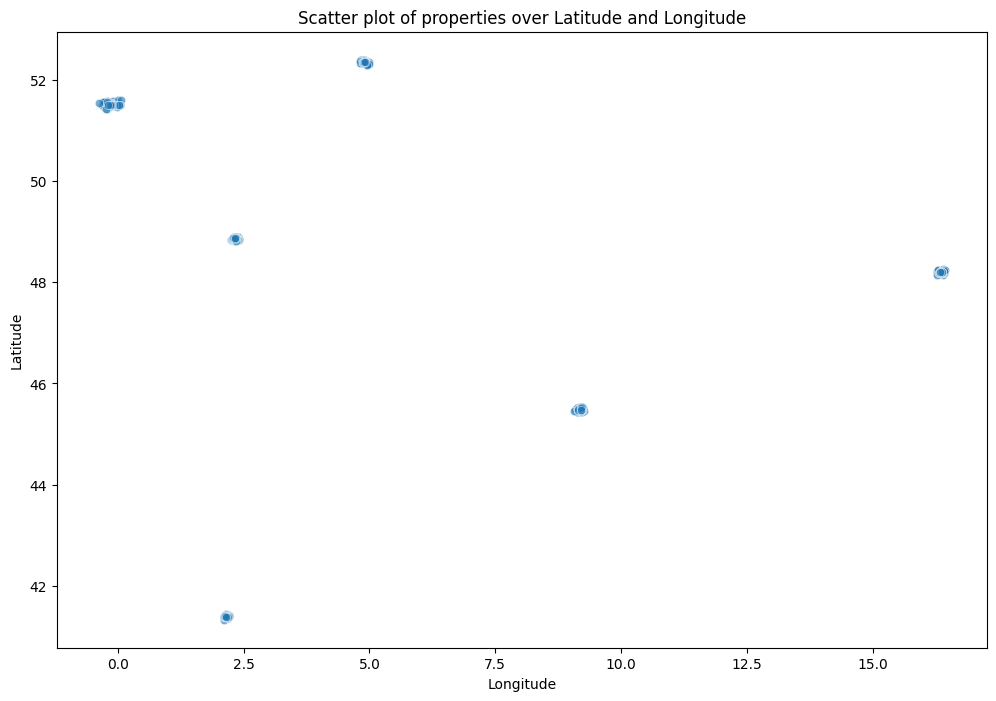

In [ ]:
# 3) Do a scatter plot to show all properties over lat and long

import matplotlib.pyplot as plt

# Extracting unique properties with their latitudes and longitudes
unique_properties = df.drop_duplicates(subset='Hotel_Name')[['Hotel_Name', 'lat', 'lng']]

plt.figure(figsize=(12, 8))
plt.scatter(unique_properties['lng'], unique_properties['lat'], alpha=0.6, edgecolors='w', linewidth=0.5)
plt.title('Scatter plot of properties over Latitude and Longitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(False)
plt.show()


In [ ]:
# 4) Which property has highest reviews and lowest  in last 1 month of the dataset maximum date

# Convert the 'Review_Date' column to datetime format
df['Review_Date'] = pd.to_datetime(df['Review_Date'])

# Determine the maximum date and the starting date for the last month
max_date = df['Review_Date'].max()
start_date_last_month = max_date - pd.DateOffset(months=1)

# Filter reviews from the last month
last_month_reviews = df[df['Review_Date'] > start_date_last_month]

# Group by the property and count the number of reviews
property_review_counts = last_month_reviews['Hotel_Name'].value_counts()

# Properties with the highest and lowest number of reviews
property_most_reviews = property_review_counts.idxmax()
most_reviews_count = property_review_counts.max()

property_least_reviews = property_review_counts.idxmin()
least_reviews_count = property_review_counts.min()

print(f"Property with the most reviews: {property_most_reviews} with {most_reviews_count} reviews.")
print(f"Property with the least reviews: {property_least_reviews} with {least_reviews_count} reviews.")


Property with the most reviews: Park Plaza Westminster Bridge London with 189 reviews.
Property with the least reviews: Monhotel Lounge SPA with 1 reviews.


In [ ]:
# Concatenate negative reviews and positive reviews together in a new column.
# Cleaning to be done on the column

df['combined_reviews'] = df['Negative_Review'].replace('No Negative', '') + ' ' + df['Positive_Review'].replace('No Positive', '')
df = df[df['combined_reviews'].str.strip() != '']

In [ ]:
# 1) Lower Case that column
df['combined_reviews'] = df['combined_reviews'].str.lower()

In [ ]:
# 2) Remove stop words
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
df['combined_reviews'] = df['combined_reviews'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# 3) Remove punctuations
df['combined_reviews'] = df['combined_reviews'].str.replace('[^\w\s]', '')

<ipython-input-13-03cef4ac01c4>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['combined_reviews'] = df['combined_reviews'].str.replace('[^\w\s]', '')


In [ ]:
# 4) Apply Lemmitization/Stemming (Check accuracy with both)

from nltk.stem import WordNetLemmatizer, PorterStemmer

nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
df['lemmatized_reviews'] = df['combined_reviews'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))

stemmer = PorterStemmer()
df['stemmed_reviews'] = df['combined_reviews'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
# 5) Apply TF-IDF and Count Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

tfidf_vectorizer = TfidfVectorizer()
X_tfidf_lemma = tfidf_vectorizer.fit_transform(df['lemmatized_reviews'])
X_tfidf_stem = tfidf_vectorizer.fit_transform(df['stemmed_reviews'])

count_vectorizer = CountVectorizer()
X_count_lemma = count_vectorizer.fit_transform(df['lemmatized_reviews'])
X_count_stem = count_vectorizer.fit_transform(df['stemmed_reviews'])

In [ ]:
# 6) Convert Reviewer_Score to integer
df['Reviewer_Score'] = df['Reviewer_Score'].round().astype(int)

# Split data for each representation
from sklearn.model_selection import train_test_split

X_train_tfidf_lemma, X_test_tfidf_lemma, y_train_tfidf_lemma, y_test_tfidf_lemma = train_test_split(X_tfidf_lemma, df['Reviewer_Score'], test_size=0.2, random_state=42)
X_train_tfidf_stem, X_test_tfidf_stem, y_train_tfidf_stem, y_test_tfidf_stem = train_test_split(X_tfidf_stem, df['Reviewer_Score'], test_size=0.2, random_state=42)
X_train_count_lemma, X_test_count_lemma, y_train_count_lemma, y_test_count_lemma = train_test_split(X_count_lemma, df['Reviewer_Score'], test_size=0.2, random_state=42)
X_train_count_stem, X_test_count_stem, y_train_count_stem, y_test_count_stem = train_test_split(X_count_stem, df['Reviewer_Score'], test_size=0.2, random_state=42)


In [ ]:
# 7) Apply model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression(max_iter=1000)

In [ ]:
# For Lemmatized with TF-IDF
lr.fit(X_train_tfidf_lemma, y_train_tfidf_lemma)
accuracy_tfidf_lemma = accuracy_score(y_test_tfidf_lemma, lr.predict(X_test_tfidf_lemma))

In [ ]:
# For Stemmed with TF-IDF
lr.fit(X_train_tfidf_stem, y_train_tfidf_stem)
accuracy_tfidf_stem = accuracy_score(y_test_tfidf_stem, lr.predict(X_test_tfidf_stem))

In [ ]:
# For Lemmatized with Count Vectorizer
lr.fit(X_train_count_lemma, y_train_count_lemma)
accuracy_count_lemma = accuracy_score(y_test_count_lemma, lr.predict(X_test_count_lemma))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# For Stemmed with Count Vectorizer
lr.fit(X_train_count_stem, y_train_count_stem)
accuracy_count_stem = accuracy_score(y_test_count_stem, lr.predict(X_test_count_stem))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#Accuracies
accuracy_tfidf_lemma, accuracy_tfidf_stem, accuracy_count_lemma, accuracy_count_stem

(0.4536394307209059,
 0.4551809051072246,
 0.45295109939116607,
 0.4529898786210106)